# BASIC CONCEPT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])             ## Assign the original CENTERS
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])  ## Assign the standard deviation for each CENTER
X, y = make_blobs(n_samples=2000, centers=blob_centers, 
                  cluster_std=blob_std, random_state=7) # Create 2000 random instances with above information, random_state for reproducibility

In [12]:
print(X) # 2000 x  2  # X[:,0] for Ox and X[:,1] for Oy in Oxy (2D) Dimension
print(y) # 2000 x (1) # y is the cluster that the corresponding X belongs to

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]
[4 2 0 ... 3 0 2]


In [28]:
def plot_clusters(X, y=None): #y labels for each instances can give us ability to color the cluster based on colours
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

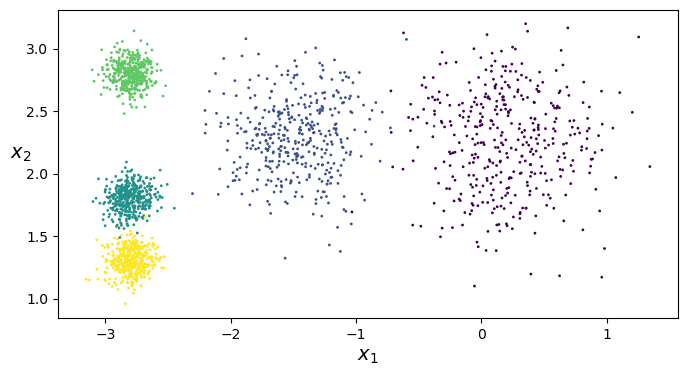

In [34]:
plt.figure(figsize=(8, 4))
plot_clusters(X,y)  # plot_clusters(X) is original code, that does not give us 5 different colors

In [173]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X) # Fit X and then based on X to predict back to y_predict (may be different from y)

In [42]:
print(y_pred)   # Above result
print(y_pred == kmeans.labels_) 
y_pred is kmeans.labels_ # fit_predict(X) is the same as fit() then predict(X) / labels_

[2 2 4 ... 1 4 2]
[ True  True  True ...  True  True  True]


True

In [46]:
kmeans.cluster_centers_
# Based on X created by 5 original centers
# When fitting in the model KMeans, it will choose k (k=5) new centroids that fit well the model

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [48]:
# Predict
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1], dtype=int32)

# (CHALLENGING) VISUALISATION

In [55]:
def plot_data(X):
    plt.plot(X[:, 0], # For Ox axis
             X[:, 1], # For Oy axis
             'k.', # color = black
             markersize=2) # font size

In [61]:
# JUST FOR DEFINE THE LOCATION OF THE CENTROID IN THE GRAPH
def plot_centroids(centroids,  # centroid location - Same format with kmeans.cluster_centers_ above
                   weights=None,  # Dont know...
                   circle_color='w',  
                   cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [165]:
def plot_decision_boundaries(clusterer, 
                             X, 
                             resolution=1000, 
                             show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1 
    maxs = X.max(axis=0) + 0.1 
        # Result: 2 x (1) array (2 taken from number of X's columns). 2 numbers is the minimum/maximum of each column
        # axis = 0: search by column;           axis = 1: search by row
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), # 1000 numbers from min to max of the Ox, size 1000 (A)
                         np.linspace(mins[1], maxs[1], resolution)) # 1000 numbers from min to max of the Oy, size 1000 (B)
    # xx have size (BxA) 1000x1000 with value from np.linspace(mins[0], maxs[0], resolution)
    # That value in each column (A columns) will be the same
    # yy have size (BxA) 1000x1000 with value repeatedly from np.linspace(mins[1], maxs[1], resolution)
    # That value in each row (B rows) will be the same
    
    # Example for meshgrid and ravel is in the next code chunk
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]) # Flatten then use them to predict
    Z = Z.reshape(xx.shape) # Change it back to 1000x1000 for coloring (contour)

    plt.contourf(Z, extent=(mins[0], maxs[0],  # range for Ox axis
                            mins[1], maxs[1]), # range for Oy axis
                cmap="Pastel2") # Colour area for each cluster based on all combination from meshgrid and ravel
    
    plt.contour(Z, extent=(mins[0], maxs[0],   # range for Ox axis
                           mins[1], maxs[1]),  # range for Oy axis
                linewidths=1, colors='k') # Draw a border of each cluster based on all combination from meshgrid and ravel
    
    plot_data(X) # Add points
    
    if show_centroids: # Show the centroids using plot_centroids function created above
        plot_centroids(clusterer.cluster_centers_) # In this case is KMeans.cluster_centers_
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

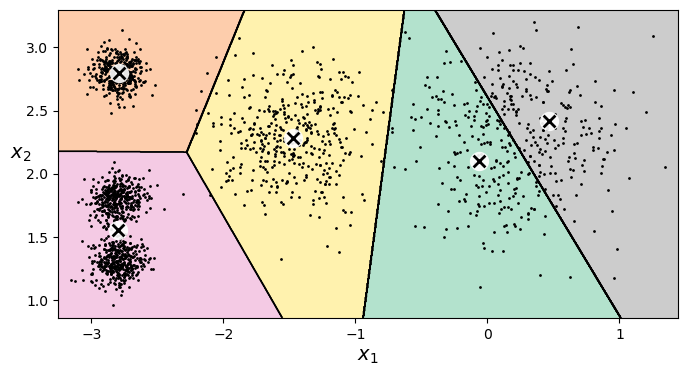

In [167]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

### Meshgrid and Ravel
Let x = [1, 2, 3, 4] and y = [5, 6, 7], then xx, yy = np.meshgrid(x,y)
- xx = \begin{matrix}
[[1 & 2 & 3 & 4]\\
[1 & 2 & 3 & 4]\\
[1 & 2 & 3 & 4]]
\end{matrix}
- xx.ravel() = [1,2,3,4,1,2,3,4,1,2,3,4]
- yy = \begin{matrix}
[[5 & 5 & 5 & 5]\\
[6 & 6 & 6 & 6]\\
[7 & 7 & 7 & 7]]
\end{matrix}
- yy.ravel() = [5,5,5,5,6,6,6,6,7,7,7,7]

## Have X and try to find the centroid location

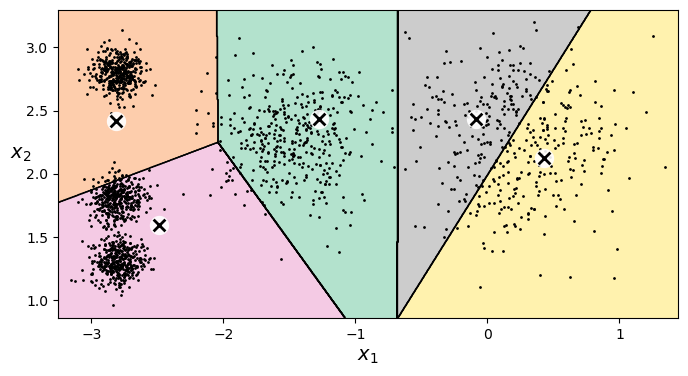

In [194]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      max_iter=1, random_state=0)
kmeans_iter1.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter1, X)

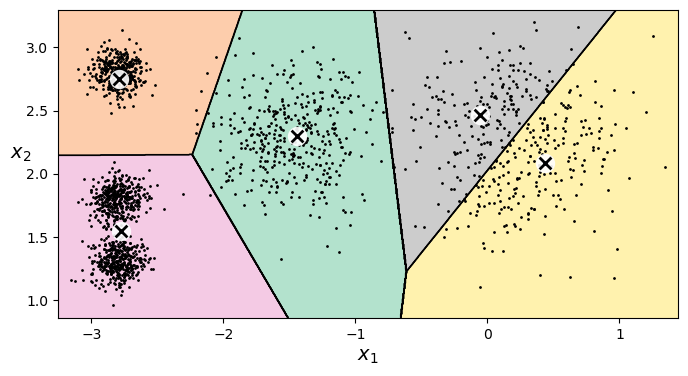

In [188]:
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      max_iter=2, random_state=0)
kmeans_iter2.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter2, X)

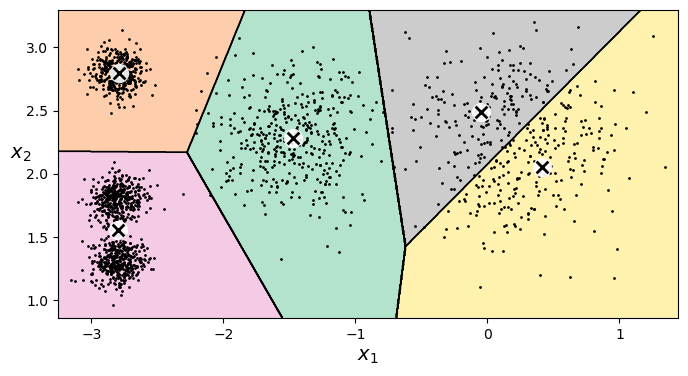

In [192]:
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      max_iter=3, random_state=0)
kmeans_iter3.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter3, X)

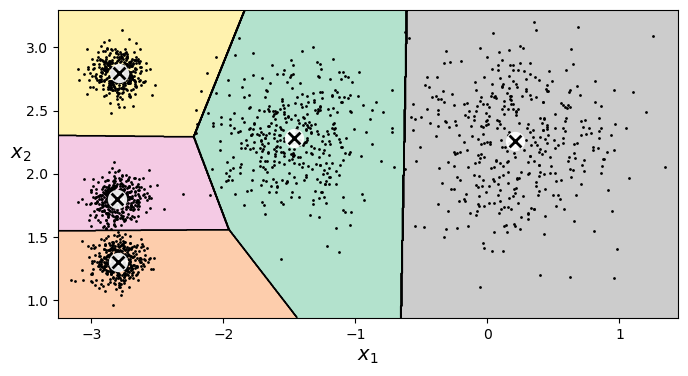

In [209]:
kmeans_iter100 = KMeans(n_clusters=5, init="random", 
                        n_init=10,  # 10 times choosing new centroids
                        max_iter=10, # 10 times updating area and instances for each centroids
                        random_state=0)
kmeans_iter100.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_iter100, X)